# Find shortest path through a maze


## Strategy

- maintain an array (of some kind) of paths, each of which is a list of points

- initialise with just one path, containing only the origin (eg point 1,1)

- incrementally extend all paths:

 - first get all the open neighbouring cells
 
 - then exclude all those that have already been visited
 
 - if only one open cell remains, just extend the path by adding the cell
 
 - if there are more than one, then create a new path (branch) for each additional cell (beyond the first)
 
 - if there are no open cells then kill the path (delete it)
 
- Stop when reach the target

- This must, by definition, find the shortest path - as it makes all possible paths, and terminates when the first one succeeds.  (Note that where there are two paths leading to a given intermediate tile, the longer one will be killed, so shorter successful paths aren't missed this way).

- However there are computationally quicker ways to find the target, notably by sorting the paths before each iteration and only extending that which is nearest (as the crow flies) to the target.

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
from importlib import reload
from copy import deepcopy
import maze

### Make a small test maze

- maze generation algorithm from https://en.wikipedia.org/wiki/Maze_generation_algorithm

In [62]:
m1 = maze.maze(height=10, width=15)
m1

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True],
       [ True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False,  True, False,  True],
       [ True, False,  True, False,  True,  True,  True,  True,  True,
         True,  True, False,  True, False,  True],
       [ True, False,  True, False,  True, False, False, False, False,
        False, False, False,  True, False,  True],
       [ True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True, False,  True],
       [ True, False, False, False, False, False,  True, False, False,
        False, False, False, False, False,  True],
       [ True,  True,  T

In [64]:
# set a target (and check it's empty, i.e. False)
m1_target = (8,9)
m1[m1_target]

False

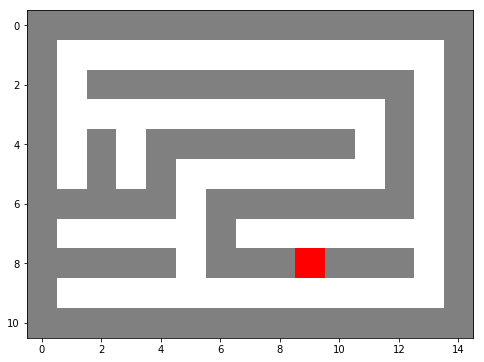

In [67]:
# draw it
maze.draw_maze(m1, target=m1_target)

### Just get the solution

In [68]:
m1_sol = maze.incr_search(m1, target=m1_target, ret_paths=False, _debug=False)
m1_sol

------------ TARGET FOUND ------------
Path length:                            23
Successful path number:                  4
Number of paths tried:                   7
Number of dead ends:                     2
Total tiles visited:                    60
Time taken (ms):                      1.57
--------------------------------------


[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (2, 13),
 (3, 13),
 (4, 13),
 (5, 13),
 (6, 13),
 (7, 13),
 (7, 12),
 (7, 11),
 (7, 10),
 (7, 9),
 (8, 9)]

### Draw it

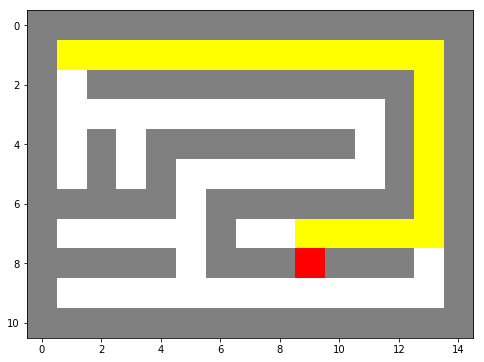

In [69]:
maze.draw_maze(m1, path=m1_sol, target=m1_target)

### Can also get and draw all the paths visited

In [70]:
m1_paths = maze.incr_search(m1, target=m1_target, ret_paths=True, _debug=False)

------------ TARGET FOUND ------------
Path length:                            23
Successful path number:                  4
Number of paths tried:                   7
Number of dead ends:                     2
Total tiles visited:                    60
Time taken (ms):                      3.12
--------------------------------------


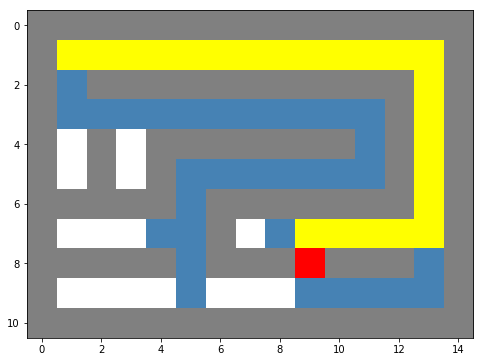

In [71]:
maze.draw_maze(m1, path=m1_sol, paths=m1_paths, target=m1_target)

Not many more in this simple case

### Under the hood

In [72]:
maze.incr_search(m1, target=m1_target, ret_paths=False, _debug=True)



----------------------------------ITERATION 0 ----------------------------------

Live paths:                         1
--> 00 [(1, 1)]

Dead paths:                         0

Tiles seen:                         1
Latest:                            [(1, 1)] 

██████████████████████████████
██00                        ██
██  ██████████████████████  ██
██                      ██  ██
██  ██  ██████████████  ██  ██
██  ██  ██              ██  ██
██████████  ██████████████  ██
██          ██              ██
██████████  ██████<>██████  ██
██                          ██
██████████████████████████████


Entering path                     00
Selecting head:                    (1, 1)
-> Neighbours found:               [(1, 2), (2, 1)]

-> Extending current path with    (1, 2)
-> Current path now:               [(1, 1), (1, 2)]

--> Creating branch for           (2, 1)


----------------------------------ITERATION 1 ----------------------------------

Live paths:                         2
--> 00

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (2, 13),
 (3, 13),
 (4, 13),
 (5, 13),
 (6, 13),
 (7, 13),
 (7, 12),
 (7, 11),
 (7, 10),
 (7, 9),
 (8, 9)]

### A bigger maze

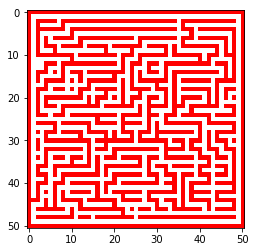

In [32]:
m3 = maze.maze(width=50, height=50, complexity=0.9)
maze.draw_maze(m3)

Set a target (and check it's open - i.e. False)

In [39]:
m3_target = (41, 17)
m3[m3_target]

False

In [40]:
m3_sol = maze.incr_search(m3, m3_target)

------------ TARGET FOUND ------------
Path length:                            56
Successful path number:                 61
Number of paths tried:                  63
Number of dead ends:                    42
Total tiles visited:                   549
Time taken (ms):                     17.71
--------------------------------------


In [41]:
m3_paths = maze.incr_search(m3, m3_target, ret_paths=True)

------------ TARGET FOUND ------------
Path length:                            56
Successful path number:                 61
Number of paths tried:                  63
Number of dead ends:                    42
Total tiles visited:                   549
Time taken (ms):                     26.26
--------------------------------------


In [45]:
reload(maze)

<module 'maze' from '/home/gav/programming/python/algorithms/maze.py'>

In [47]:
m3.shape

(51, 51)

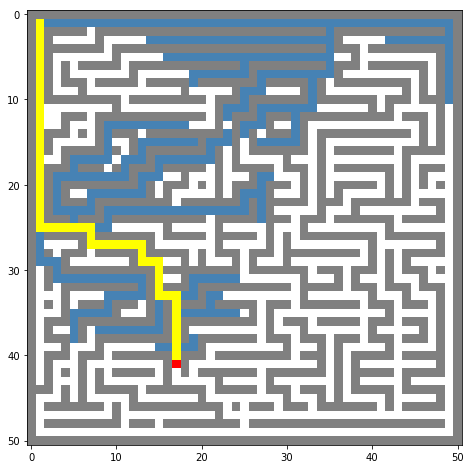

In [46]:
maze.draw_maze(m3, target=m3_target, path=m3_sol, paths=m3_paths)

## Directed finds a longer path, in quicker time

(well, some times it's longer!)

------------ TARGET FOUND ------------
Path length:                            56
Successful path number:                 61
Number of paths tried:                  63
Number of dead ends:                    42
Total tiles visited:                   549
Time taken (ms):                     26.10
--------------------------------------


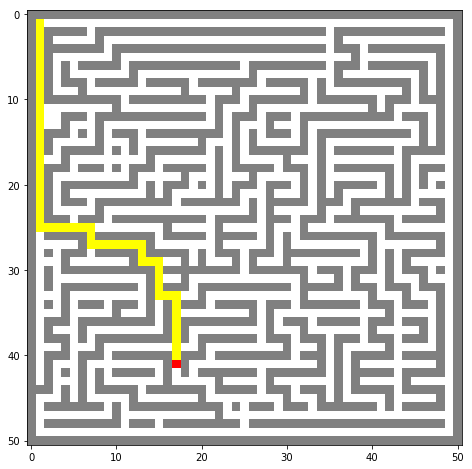

In [50]:
maze.draw_maze(m3, target=m3_target, path=maze.incr_search(a_maze, target=target))